<a href="https://colab.research.google.com/github/daheeem/Artificial-Neural-Network/blob/main/Single_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer Perceptron

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# FORMULASI MASALAH

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).


# Import Data

In [2]:
#Mengimport data dari file Trial.xlsx
from google.colab import files
TheFile = files.upload()

Saving trial.csv to trial.csv


In [3]:
df = pd.read_csv('trial.csv')

In [4]:
print(df)

     Sector_score LOCATION_ID  PARA_A  SCORE_A  PARA_B  SCORE_B  TOTAL  \
0            3.89          23    4.18        6    2.50        2   6.68   
1            3.89           6    0.00        2    4.83        2   4.83   
2            3.89           6    0.51        2    0.23        2   0.74   
3            3.89           6    0.00        2   10.80        6  10.80   
4            3.89           6    0.00        2    0.08        2   0.08   
..            ...         ...     ...      ...     ...      ...    ...   
771         55.57           9    0.49        2    0.40        2   0.89   
772         55.57          16    0.47        2    0.37        2   0.84   
773         55.57          14    0.24        2    0.04        2   0.28   
774         55.57          18    0.20        2    0.00        2   0.20   
775         55.57          15    0.00        2    0.00        2   0.00   

     numbers  Marks  Money_Value  MONEY_Marks  District  Loss  LOSS_SCORE  \
0        5.0      2         3.38  

# Pra-Pemrosesan Data

In [5]:
#Mengecek apakah terdapat Missing Value
df.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [6]:
#Mengganti missing value dengan nilai rata-rata
df['Money_Value'].fillna(df['Money_Value'].mean(), inplace = True)

In [7]:
#Menghapus data bertipe String serta mengganti seluruh data menjadi bertipe float
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)

In [8]:
#Mengecek apakah terdapat data yang duplikat
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
771     True
772    False
773    False
774    False
775    False
Length: 773, dtype: bool

In [9]:
#Menghapus data yang duplikat
df= df.drop_duplicates()
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
770    False
772    False
773    False
774    False
775    False
Length: 760, dtype: bool

# VISUALISASI DATA


Melihat Outlier Data menggunakan Box Plot

<AxesSubplot:>

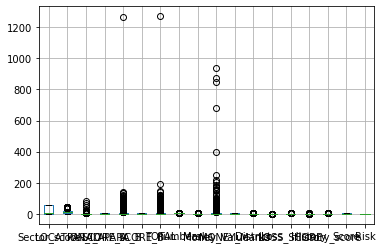

In [10]:
#Menampilkan boxplot
pd.DataFrame.boxplot(df)

Melakukan handling outlier data

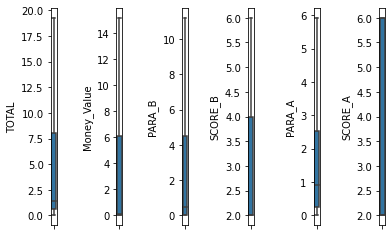

In [11]:
# menghitung jarak interquartile
def interquartile(data,x):
  q1 = (data[x]).quantile(0.25)
  q3 = (data[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

# menggantikan value outliners dengan hasil dari perhitungan jarak interquartile
def sub_outliners(data,x,maximum,minimum):
  more_than = (data[x] > maximum)
  less_than = (data[x] < minimum)
  data[x] = data[x].mask(more_than, maximum,axis=0)
  data[x] = data[x].mask(less_than, minimum,axis=0)
  return data

maximum,minimum = interquartile(df,'Money_Value')
df = sub_outliners(df,'Money_Value',maximum,minimum)

maximum,minimum = interquartile(df,'TOTAL')
df = sub_outliners(df,'TOTAL',maximum,minimum)

maximum,minimum = interquartile(df,'PARA_A')
df = sub_outliners(df,'PARA_A',maximum,minimum)

maximum,minimum = interquartile(df,'PARA_B')
df = sub_outliners(df,'PARA_B',maximum,minimum)

f, a = plt.subplots(1, 6)

sns.boxplot(y=df["TOTAL"], ax=a[0])
sns.boxplot(y=df["Money_Value"], ax=a[1])
sns.boxplot(y=df["PARA_B"], ax=a[2])
sns.boxplot(y=df["SCORE_B"], ax=a[3])
sns.boxplot(y=df["PARA_A"], ax=a[4])
sns.boxplot(y=df["SCORE_A"], ax=a[5])
plt.subplots_adjust(wspace=10)

Melihat korelasi antar atribut

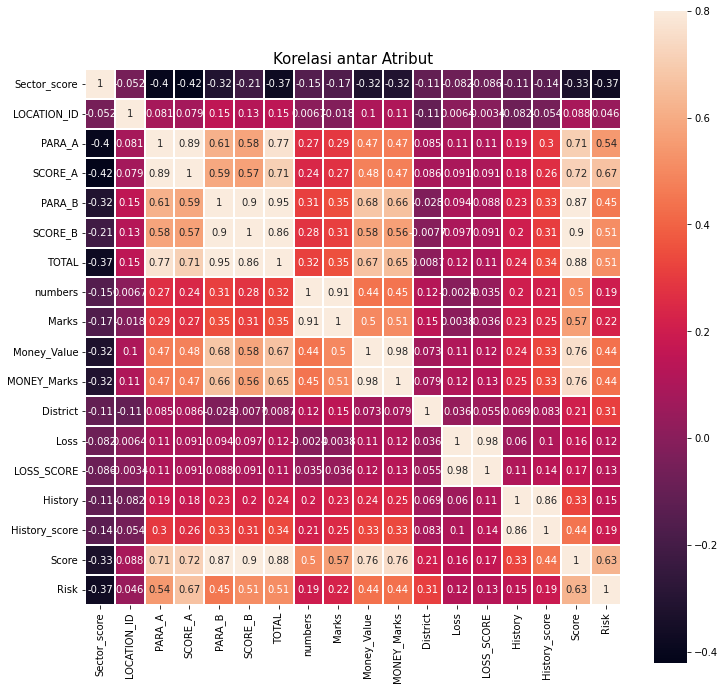

In [12]:
#Menampilkan korelasi antar atribut
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), vmax=0.8, linewidths=0.01, square=True, annot=True)
plt.title('Korelasi antar Atribut', y=1, size=15)
plt.show()

# Normalisasi Data


Normalisasi data dengan skala 0:1

In [13]:
#Melakukan normalisasi data menjadi berskala 0-1
normalizedData = (df-np.min(df))/(np.max(df)-np.min(df))
print(normalizedData)

     Sector_score  LOCATION_ID    PARA_A  SCORE_A    PARA_B  SCORE_B  \
0        0.035172     0.511628  0.705336      1.0  0.223090      0.0   
1        0.035172     0.116279  0.000000      0.0  0.431009      0.0   
2        0.035172     0.116279  0.086058      0.0  0.020524      0.0   
3        0.035172     0.116279  0.000000      0.0  0.963748      1.0   
4        0.035172     0.116279  0.000000      0.0  0.007139      0.0   
..            ...          ...       ...      ...       ...      ...   
770      0.926207     0.395349  0.126556      0.0  0.040156      0.0   
772      0.926207     0.348837  0.079308      0.0  0.033017      0.0   
773      0.926207     0.302326  0.040498      0.0  0.003569      0.0   
774      0.926207     0.395349  0.033748      0.0  0.000000      0.0   
775      0.926207     0.325581  0.000000      0.0  0.000000      0.0   

        TOTAL  numbers  Marks  Money_Value  MONEY_Marks  District  Loss  \
0    0.346383     0.00    0.0     0.222368          0.0     

Memisahkan atribut risk sebagai atribut target


In [14]:
#Memisahkan data Risk
data_y = df.Risk
print(data_y)

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
770    0.0
772    0.0
773    0.0
774    0.0
775    0.0
Name: Risk, Length: 760, dtype: float64


# Reduksi Dimensi


Reduksi dimensi menggunakan PCA, menjadi 2 atribut yaitu PCA_1 dan PCA_2


In [15]:
#Reduksi dimensi menggunakan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit_pca = pca.fit_transform(normalizedData)
data_fit = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])

#Menambahkan data risk kedalam data yang sudah direduksi
data_fit['Data_y'] = data_y
print(data_fit)


        PCA_1     PCA_2  Data_y
0    0.306352  0.690275     1.0
1   -0.643414 -0.262218     0.0
2   -0.850878 -0.087746     0.0
3    1.178375 -0.793972     1.0
4   -0.889985 -0.093320     0.0
..        ...       ...     ...
755 -0.996271 -0.465221     1.0
756 -1.018995 -0.465903     0.0
757 -1.050584 -0.457563     1.0
758 -1.052274 -0.462003     0.0
759 -1.060478 -0.468110     0.0

[760 rows x 3 columns]


# Validasi Data



Validasi data menggunakan teknik Holdout validation dengan perbandingan 3:1

In [16]:
#Split data train sebanyak 75% dan data uji sebanyak 25%
latih = int((0.75* len(data_fit)))
dataLatih = data_fit[:int(latih)]
dataLatih = dataLatih.astype(float)
dataLatih.fillna(0,inplace=True)
dataUji = data_fit[int(latih): len(data_fit)]

In [17]:
#Mengganti missing value dengan 0
dataUji.fillna(0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# MODELLING SINGLE LAYER PERCEPTRON

Membuat fungsi sesuai perhitungan yang diperlukan

In [18]:
#MODELLING
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mpmath import mp

#Menghitung nilai v
def vix(w1,w2,b,x1,x2):
  target = (w1*x1) + (w2*x2) + b
  return target

#menghitung nilai ŷ
def yhat_i(vi):
  target = 1/(1+(mp.exp(-vi)))
  return target

#Melakukan prediksi
def pred(yhat_i):
  if yhat_i > 0.5:
    target = 1
  else:
    target = 0
  return target

#Menghitung nilai ∂L/∂ŷ
def DlDy(yhat_i, y):
  target = yhat_i - y
  return target

#Menghitung nilai ∂ŷ/∂v
def DyDvi(yhat_i):
  target = yhat_i - (yhat_i**2)
  return target

#Menghitung nilai 𝜕𝐿/𝜕𝑣i
def DlDvi(yhat_i, y):
  target = DlDy(yhat_i, y) * DyDvi(yhat_i)
  return target

#Menghitung nilai ∂L/∂w
def DlDw(yhat_i, y, x1):
  target = DlDvi(yhat_i,y) * x1
  return target

#Melakukan Update pada nilai w
def update(w,alpha, dw):
  w = w - (alpha*dw)
  return w

#Menghitung akurasi
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy


Memisahkan nilai y pada data test

In [19]:
#DATA TEST
array_check = []
dataUji_y = []
i = 570
j = 0
while(j < len(dataUji)):
  value = dataUji.Data_y[i]
  dataUji_y.append(value)
  i = i+1
  j = j+1

#IMPLEMENTASI MODEL

Melakukan Train data sebanyak 100 iterasi dengan learning rate sebesar 0.05

Menyimpan nilai W1,W2, dan B terakhir, kemudian melakukan data testing


In [20]:
#Hyper Parameter
w1 = 1
w2 = 1
b = 0.1
alpha = 0.05

#Forward Pass
j = 0
while (j < 100):
  array_check = []
  for i in range(len(dataLatih)):  
    x1 = dataLatih.PCA_1[i] 
    x2 = dataLatih.PCA_2[i]
    v = vix(w1,w2,b,x1,x2)
    yi = yhat_i(v)
    dldy = DlDy(yi, dataLatih.Data_y[i])
    dydvi = DyDvi(yi) 
    check = pred(yi)
    array_check.append(check)
  acc = accuracy(dataLatih.Data_y, array_check)

#Backward Pass
  dldv1 = 0
  dw1 = 0
  dw2 = 0
  for i in range(len(dataLatih)):
    x1 = dataLatih.PCA_1[i] 
    x2 = dataLatih.PCA_2[i]
    v = vix(w1,w2,b,x1,x2)
    yi = yhat_i(v)
    dldv = DlDvi(yi,dataLatih.Data_y[i])
    dldv1 = dldv1 + dldv
    dldw1 = DlDw(yi, dataLatih.Data_y[i], dataLatih.PCA_1[i])
    dldw2 = DlDw(yi, dataLatih.Data_y[i], dataLatih.PCA_2[i])  
    dw1 += dldw1
    dw2 += dldw2
  w1 = update(w1,alpha,dw1)
  w2 = update(w2,alpha,dw2)
  b  = update(b,alpha,dldv1)
  j = j +1

In [21]:
#Menghitung nilai confusion matrix
print("Confusion Matrix")
print(confusion_matrix(dataLatih.Data_y, array_check))
print("Classification Report")
print(classification_report(dataLatih.Data_y, array_check))

Confusion Matrix
[[123  47]
 [ 49 351]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72       170
         1.0       0.88      0.88      0.88       400

    accuracy                           0.83       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.83      0.83      0.83       570



In [22]:
#Hyper Parameter
w1 = 1
w2 = 1
b = 0.1
alpha = 0.05

#Forward Pass
j = 0
while (j < 100):
  array_check = []
  for i in range(len(dataLatih)):  
    x1 = dataLatih.PCA_1[i] 
    x2 = dataLatih.PCA_2[i]
    v = vix(w1,w2,b,x1,x2)
    yi = yhat_i(v)
    dldy = DlDy(yi, dataLatih.Data_y[i])
    dydvi = DyDvi(yi) 
    check = pred(yi)
    array_check.append(check)
  acc = accuracy(dataLatih.Data_y, array_check)

#Backward Pass
  dldv1 = 0
  dw1 = 0
  dw2 = 0
  for i in range(len(dataLatih)):
    x1 = dataLatih.PCA_1[i] 
    x2 = dataLatih.PCA_2[i]
    v = vix(w1,w2,b,x1,x2)
    yi = yhat_i(v)
    dldv = DlDvi(yi,dataLatih.Data_y[i])
    dldv1 = dldv1 + dldv
    dldw1 = DlDw(yi, dataLatih.Data_y[i], dataLatih.PCA_1[i])
    dldw2 = DlDw(yi, dataLatih.Data_y[i], dataLatih.PCA_2[i])  
    dw1 += dldw1
    dw2 += dldw2
  w1 = update(w1,alpha,dw1)
  w2 = update(w2,alpha,dw2)
  b  = update(b,alpha,dldv1)
  j = j +1


#Save nilai W1,W2,dan B terakhir  
W1_global = w1
W2_global = w2
B_global = b


#DATA TEST
i = 570
j = 0
array_check = []
while(j < len(dataUji)):  
    x1 = dataUji.PCA_1[i] 
    x2 = dataUji.PCA_2[i]
    v = vix(W1_global,W2_global,B_global,x1,x2)
    yi = yhat_i(v)
    dldy = DlDy(yi, dataUji.Data_y[i])
    dydvi = DyDvi(yi)
    check = pred(yi)
    array_check.append(check)
    i = i + 1
    j = j + 1
print(array_check)


[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Confusion Matrix

In [23]:
#Menghitung nilai confusion matrix
print("Confusion Matrix")
print(confusion_matrix(dataUji_y, array_check))
print("Classification Report")
print(classification_report(dataUji_y, array_check))

Confusion Matrix
[[67 41]
 [44 38]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61       108
         1.0       0.48      0.46      0.47        82

    accuracy                           0.55       190
   macro avg       0.54      0.54      0.54       190
weighted avg       0.55      0.55      0.55       190

